In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations 

In [2]:
#preparing the data
colnames = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]
df = pd.read_csv("F:/Uni/991/Pattern/SPR_HW3/SPR_HW3/inputs/P3/data_banknote_authentication.txt", names=colnames, header=None)

In [3]:
df = df.sample(frac=1 ,replace=False, axis = 0).reset_index(drop=True)

In [4]:
df_train = df.iloc[:500]
df_test = df.iloc[500:]

In [5]:
#calulating euclidean distance
def Euclidean(test1, train1):
    distance1 = np.sum((np.power((test1-train1),2)), axis = 1)
    return np.sqrt(distance1)

In [6]:
#by calculating the distance find the k nearest points to the given point
def get_neighbors(train2, ytrain2, test_row2, k2):
    dist2 = Euclidean(test_row2, train2)
    othery = ytrain2[np.argsort(dist2),0]
    neighbors_y = othery[0:k2]
    return neighbors_y

In [7]:
# predicting the class
def predict(train3, ytrain3, test_row3, k3):
    neighbors = get_neighbors(train3, ytrain3, test_row3, k3)
    neighbors2 = list(neighbors)
    #choosing the class based on the nearest neighbors (class that has come up most in the k nearest neighbors)
    prediction = max(neighbors2, key=neighbors2.count)
    return prediction

In [8]:
#knn model takes training x, training labels, test x, k
def KNNClassification(train4, ytrain4, test4, k4):
    prediction1 = np.zeros((test4.shape[0],1))
    for i in range(test4.shape[0]):
        prediction1[i,0] = predict(train4, ytrain4, test4[i,:], k4)
    return prediction1

In [9]:
#creating the combinations of features
colcomb = list(combinations([0,1,2,3], 2))

In [10]:
#preparing the training and test data
x_train = np.array(df_train.drop(columns=['Class']))
y_train = np.expand_dims(df_train['Class'],1)
x_test = np.array(df_test.drop(columns=['Class']))
y_test = np.expand_dims(df_test['Class'],1)

In [11]:
#computing the accuracy
def ComputeAccuracy(y_test, y_pred):
    tp = 0
    tn = 0
    for i in range(y_test.size):
        if y_pred[i] == y_test[i]:
            if y_test[i]==1:
                tp+=1
            else:
                tn+=1
    accuracy = (tp+tn)/y_test.size
    return accuracy

In [50]:
#initializing and getting the accuracy using each couple of features
k = 1
acc = list()
i=0
print('K=1')
for couple in colcomb:
    y_pred = KNNClassification(x_train[:,[couple[0],couple[1]]], y_train, x_test[:,[couple[0], couple[1]]], k)
    acc.append(ComputeAccuracy(y_test, y_pred))
    #finding the best couple of features
    bestcouple = colcomb[acc.index(max(acc))]
    print(couple, 'accuracy: ', acc[i])
    i+=1

K=1
(0, 1) accuracy:  0.9311926605504587
(0, 2) accuracy:  0.8853211009174312
(0, 3) accuracy:  0.8910550458715596
(1, 2) accuracy:  0.8830275229357798
(1, 3) accuracy:  0.8704128440366973
(2, 3) accuracy:  0.7247706422018348


In [51]:
#written just for the sake of having different colors for each class in the plots
index0,_ = np.where(y_train==0)
index1,_ = np.where(y_train==1)
w0 = x_train[index0,:]
w1 = x_train[index1,:]

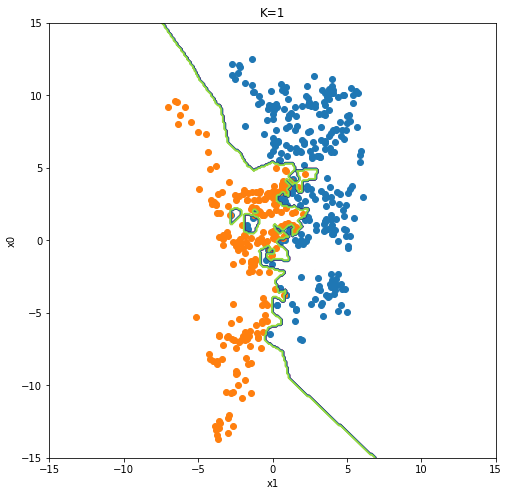

In [52]:
#knn with the best couple of features
k=1
xlist = np.linspace(-15.0, 15.0, 300)
ylist = np.linspace(-15.0, 15.0, 300)
X, Y = np.meshgrid(xlist, ylist)
Z = KNNClassification(x_train[:,[bestcouple[0],bestcouple[1]]], y_train, np.append(np.expand_dims(X.ravel(),axis=1),np.expand_dims(Y.ravel(), axis=1), axis=1), k)
Z = Z.reshape(X.shape)
plt.figure(figsize = (8,8))
#scattering the data points
plt.scatter(w0[:,bestcouple[0]],w0[:,bestcouple[1]])
plt.scatter(w1[:,bestcouple[0]],w1[:,bestcouple[1]])
#plotting the decision boundary with contour
plt.contour(X, Y, Z)
plt.title('K=1')
plt.ylabel("x"+str(bestcouple[0]))
plt.xlabel("x"+str(bestcouple[1]))
plt.show()

In [53]:
#same as before for k=3
k = 3
acc = list()
i=0
print('K=3')
for couple in colcomb:
    y_pred = KNNClassification(x_train[:,[couple[0],couple[1]]], y_train, x_test[:,[couple[0], couple[1]]], k)
    acc.append(ComputeAccuracy(y_test, y_pred))
    bestcouple = colcomb[acc.index(max(acc))]
    print(couple, 'accuracy: ', acc[i])
    i+=1

K=3
(0, 1) accuracy:  0.9311926605504587
(0, 2) accuracy:  0.8853211009174312
(0, 3) accuracy:  0.9105504587155964
(1, 2) accuracy:  0.8818807339449541
(1, 3) accuracy:  0.875
(2, 3) accuracy:  0.7144495412844036


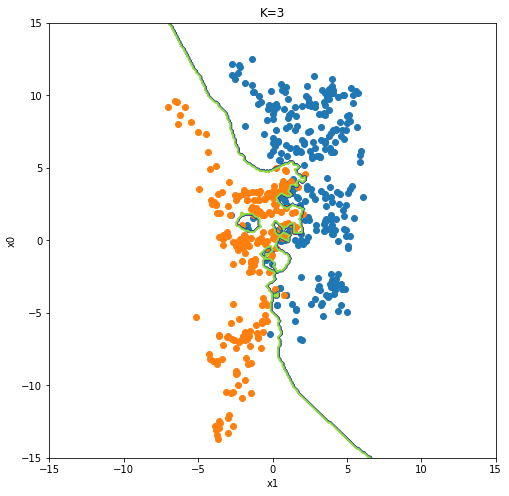

In [54]:
#same as before for k=3
k = 3
xlist = np.linspace(-15.0, 15.0, 300)
ylist = np.linspace(-15.0, 15.0, 300)
X, Y = np.meshgrid(xlist, ylist)
Z = KNNClassification(x_train[:,[bestcouple[0],bestcouple[1]]], y_train, np.append(np.expand_dims(X.ravel(),axis=1),np.expand_dims(Y.ravel(), axis=1), axis=1), k)
Z = Z.reshape(X.shape)
plt.figure(figsize = (8,8))
plt.scatter(w0[:,bestcouple[0]],w0[:,bestcouple[1]])
plt.scatter(w1[:,bestcouple[0]],w1[:,bestcouple[1]])
plt.contour(X, Y, Z)
plt.title('K=3')
plt.ylabel("x"+str(bestcouple[0]))
plt.xlabel("x"+str(bestcouple[1]))
plt.show()